# SUPPORT VECTOR CLASSIFIER

La implementación de sklearn la podemos encontrar [acá](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

Vamos a trabajar con el siguiente dataset: 

https://www.kaggle.com/rakeshrau/social-network-ads

Las siguientes lineas lo descargan a su entorno de colab y lo importan como dataframe de pandas:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from f_func import fmatcon


In [2]:
# Funcion Grafica Matriz de Confusión.
def matcon(yt,yp,model):
    cm=confusion_matrix(yt, yp)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    fpr=cm[0,1]/(cm[0, 1]+cm[0,0])
    tpr=cm[1,1]/(cm[1,1]+cm[1,0])
    return fpr,tpr

In [3]:
df = pd.read_csv("social_net_ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Para nuestro problema, sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary`. Y como target a la columna `Purchased`

Separar en X e Y quedándonos con esas columnas:

In [5]:
#COMPLETAR
X = df.copy()[['Age', 'EstimatedSalary']]


In [6]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y =  df.iloc[:, 4].values

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

Luego, debemos separar los datos de entrenamiento de los datos de testing, mediante la función `train_test_split`.

Separar los datos en train-test:

Utilizar un test_size de 0.25 y random state de 0

In [9]:
#COMPLETAR
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Además, vamos a proceder a estandarizar los datos.

Utilizar un standardScaler. Recuerden hacer fit solo sobre train.

In [10]:
#COMPLETAR #metodo 1 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


#Util para pipelines!!
# numerical_features = ['Age', 'EstimatedSalary']

# # preprocessor
# preprocessor = ColumnTransformer(transformers=[('scalar',
#                                                 Pipeline(steps=[('scalar', StandardScaler())]),
#                                                 numerical_features),
#                                                ],
#                                  remainder='passthrough'
#                                 )                               


In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_trainS = sc_X.fit_transform(X_train)
X_testS = sc_X.transform(X_test)

Vamos a realizar el entrenamiento de nuestra SVM.

Importar SVC de sklearn y entrenarlo.

Utilizar un valor de C=1, un kernel='linear' y un random_state de 0.

In [12]:
#COMPLETAR
from sklearn.svm import SVC

classifier = SVC(C = 1, kernel = 'linear', random_state = 0)
classifier.fit(X_trainS, y_train)

SVC(C=1, kernel='linear', random_state=0)

Una vez finalizado el entrenamiento, podemos realizar las predicciones sobre los datos de testing.

Guardar en una variable llamada Y_Pred las predicciones sobre el set de test.

In [13]:
#COMPLETAR
y_pred = classifier.predict(X_testS)

Seguidamente, vamos a visualizar los resultados mediante:
 
* `Matriz de Confusión`
* `Reporte de Clasificación`
* `Gráfico de límites de Decisión`

Graficar la matriz de confusión:

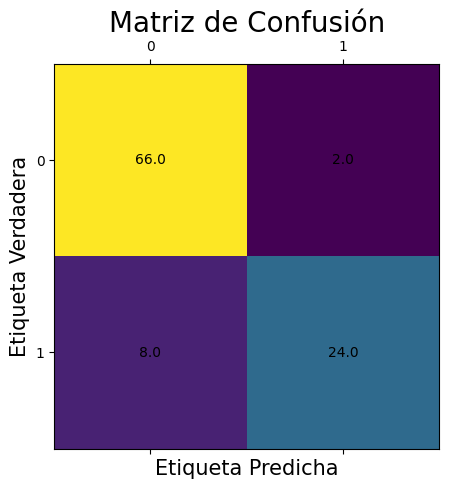

In [14]:
#COMPLETAR
# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

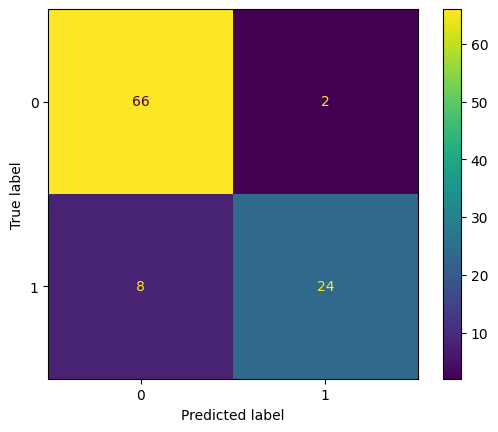

(0.029411764705882353, 0.75)

In [15]:
matcon(y_test,y_pred,classifier)

Imprimir el classification report utilizando la función de sklearn:

In [16]:
#COMPLETAR
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



El siguiente código, no es necesario mirarlo en detalle. Vamos a simplemente ejecutarlo para visualizar.

Es importante que tengan las variables definidas con los nombres:

X_Train, Y_Train. Si no, deberán modificar el código para poner los nombres que ustedes tengan.

Set de train:

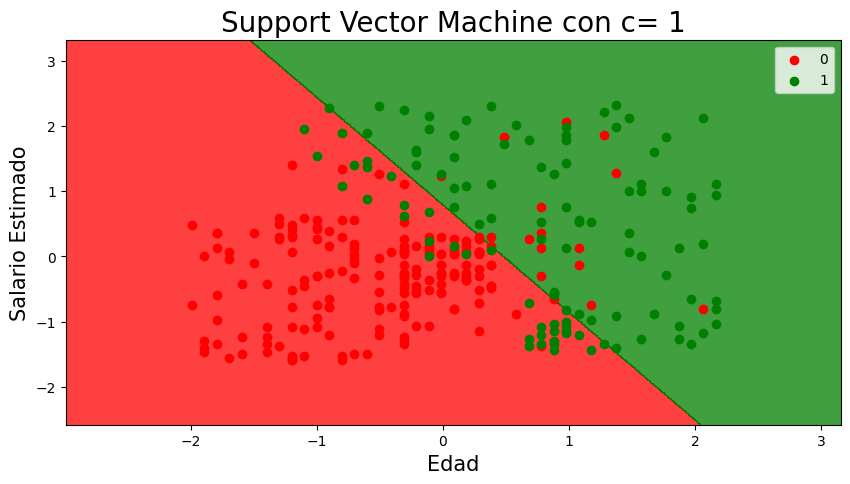

In [17]:
from matplotlib.colors import ListedColormap


def plot_decision_boundaries(X, Y,c):
  X_Set, Y_Set = X, Y
  X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

  plt.figure(figsize=(10,5))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(Y_Set)):
      plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                  c = [ListedColormap(('red', 'green'))(i)], label = j)
  plt.title(f'Support Vector Machine con c= {c}', fontsize=20)
  plt.xlabel('Edad', fontsize=15)
  plt.ylabel('Salario Estimado', fontsize=15)
  plt.legend()
  plt.show()

plot_decision_boundaries(X_trainS, y_train, 1)

Set de test:

(X_Test, Y_Test)

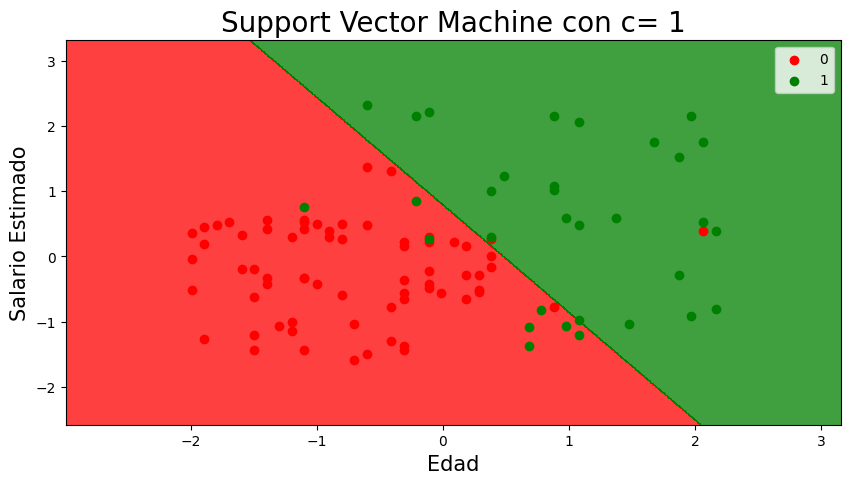

In [18]:
plot_decision_boundaries(X_testS, y_test, 1)

Modificar el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance.

Train:

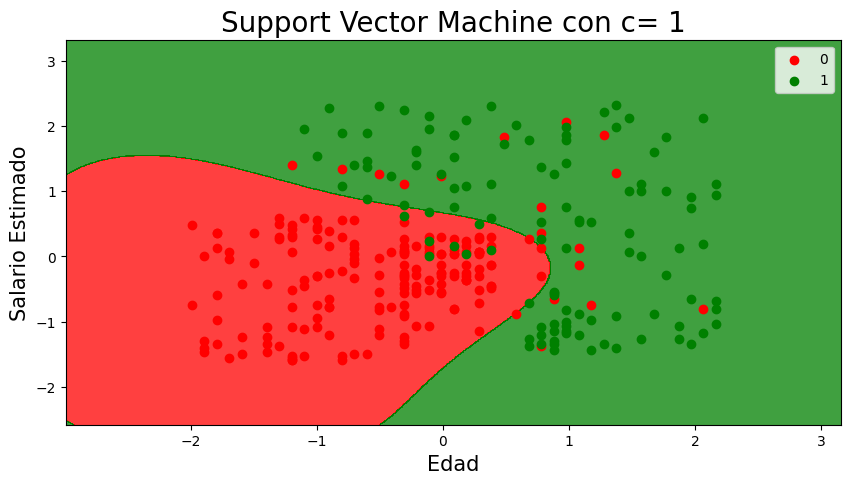

In [19]:
#COMPLETAR
classifier = SVC(C=1, kernel = 'rbf')
classifier.fit(X_trainS, y_train)
plot_decision_boundaries(X_trainS, y_train, c=1)

Test:

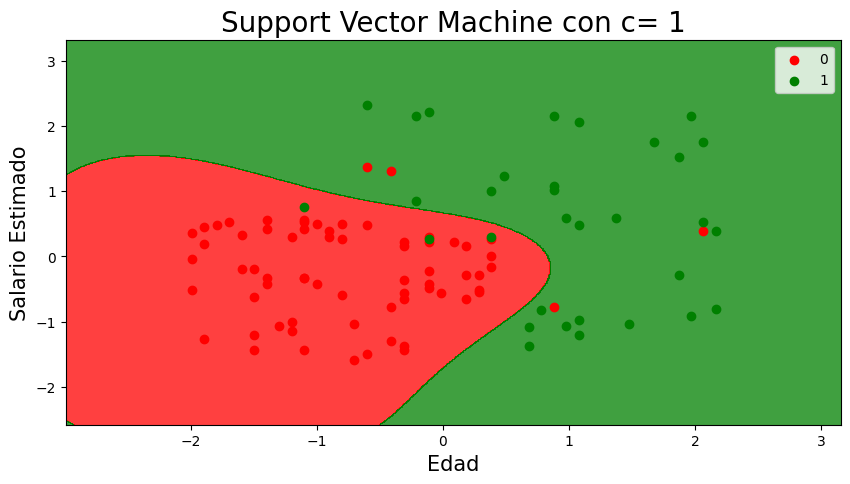

In [20]:
#COMPLETAR
plot_decision_boundaries(X_testS, y_test, c=1)

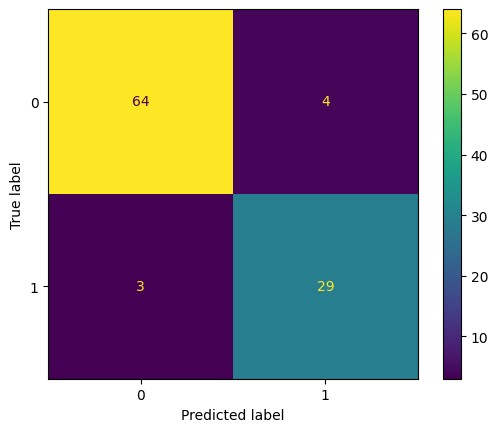

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [21]:
y_pred = classifier.predict(X_testS)
matcon(y_test,y_pred,classifier)
print(classification_report(y_test,y_pred))

Modificar el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. ¿Cómo se puede interpretar la acción de `C`? 

Train

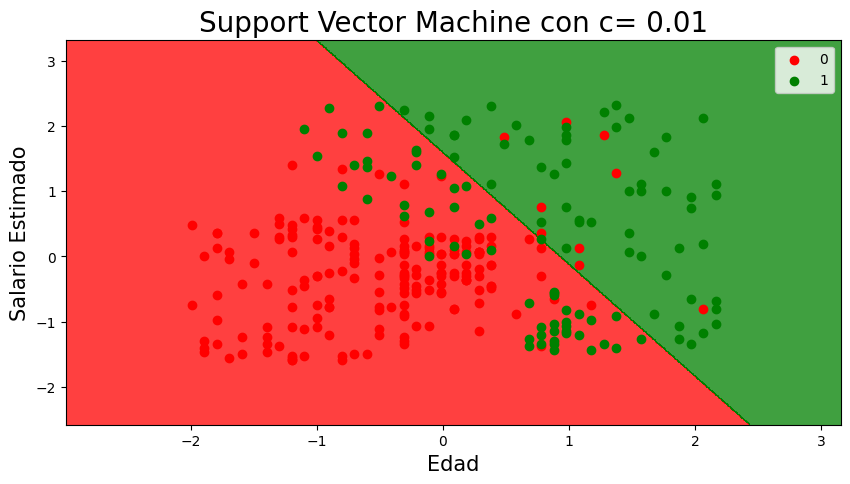

In [22]:
#COMPLETAR
classifier = SVC(C = 0.01, kernel = 'linear', random_state = 0)
classifier.fit(X_trainS, y_train)
y_pred = classifier.predict(X_testS)

plot_decision_boundaries(X_trainS, y_train, c= 0.01)

Test

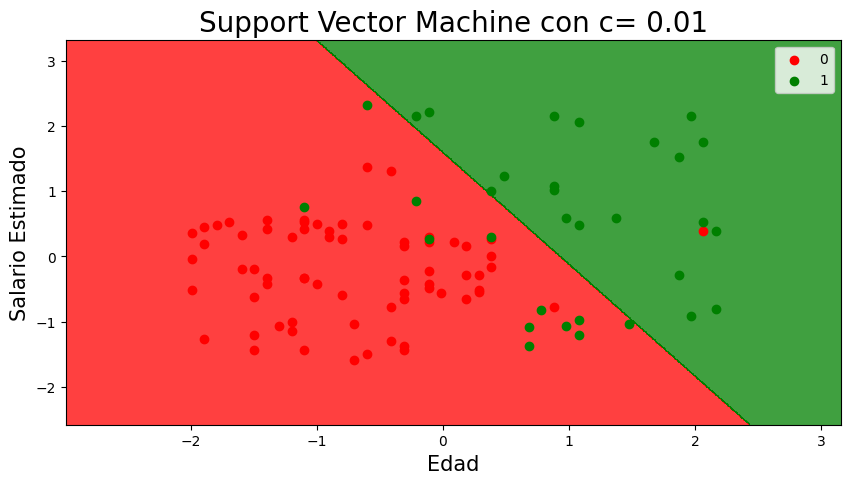

In [23]:
#COMPLETAR
plot_decision_boundaries(X_testS, y_test, c= 0.01)

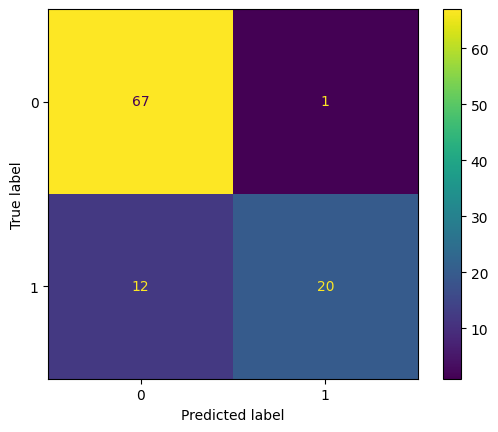

              precision    recall  f1-score   support

           0       0.85      0.99      0.91        68
           1       0.95      0.62      0.75        32

    accuracy                           0.87       100
   macro avg       0.90      0.81      0.83       100
weighted avg       0.88      0.87      0.86       100



In [24]:
matcon(y_test,y_pred,classifier)
print(classification_report(y_test,y_pred))

Utilizando GridSearchCV, buscar los mejores valores para c y kernel.

Probar: 

C: 0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1

kernel: "linear", "poly", "rbf", "sigmoid"

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
#COMPLETAR

SVC_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("SVC", SVC())
])

# Definir los parámetros a ajustar
param_SVC = {
    'SVC__C': np.logspace(-3, 3, 7),
    'SVC__kernel': ['linear','poly','rbf','sigmoid']
}

grid_SVC= GridSearchCV(SVC_pipe, param_SVC, cv=5, scoring='accuracy')

# Realizar la búsqueda de parámetros óptimos
grid_SVC.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC())]),
             param_grid={'SVC__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'SVC__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

¿Cuáles son los mejores hiperparámetros?

In [27]:
#COMPLETAR
print("Mejores parámetros encontrados:")
print(grid_SVC.best_params_)

Mejores parámetros encontrados:
{'SVC__C': 1.0, 'SVC__kernel': 'rbf'}


¿Qué score obtiene el mejor clasificador?

In [28]:
#COMPLETAR
# Evaluar el modelo en el conjunto de prueba
accuracy = grid_SVC.score(X_test, y_test)
print(f'accuracy: {accuracy}')

accuracy: 0.93


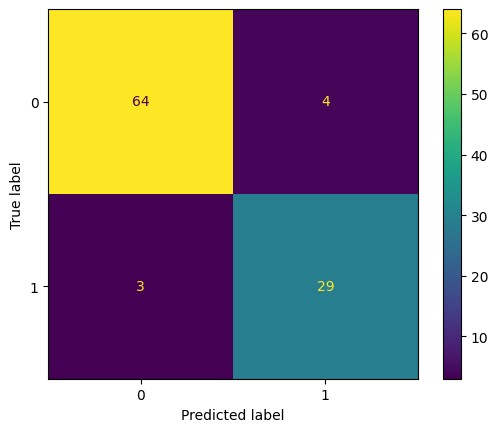

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [29]:
y_pred = grid_SVC.predict(X_test)

matcon(y_test,y_pred,grid_SVC)
print(classification_report(y_test,y_pred))

accuracy: 0.93


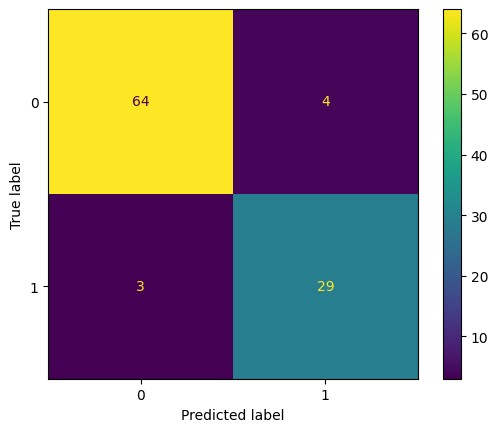

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [30]:
# Establecer los parámetros en el pipeline y ajustar con X_train, y_train
SVC_pipe.set_params(SVC__C=1, SVC__kernel='rbf')
SVC_pipe.fit(X_train, y_train)

# Aplicar el pipeline al conjunto de prueba
y_pred = SVC_pipe.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
accuracy = grid_SVC.score(X_test, y_test)
print(f'accuracy: {accuracy}')

matcon(y_test,y_pred,SVC_pipe)
print(classification_report(y_test,y_pred))

accuracy: 0.93


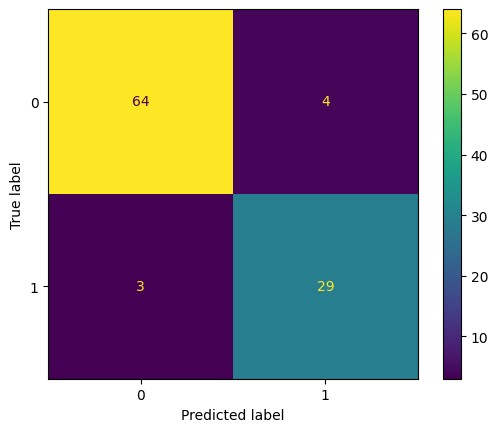

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [31]:
# Definir los parámetros a ajustar
SVC_m=SVC()

param_SVC = {
    'C': np.linspace(0.6, 1.2, 10000),
    'kernel': ['linear','poly','rbf','sigmoid']
}

SVC_grid= GridSearchCV(SVC_m, param_SVC, cv=5, scoring='accuracy')

# Realizar la búsqueda de parámetros óptimos
SVC_grid.fit(X_trainS, y_train)

# Aplicar el pipeline al conjunto de prueba
y_pred = SVC_grid.predict(X_testS)

# Evaluar el modelo en el conjunto de prueba
accuracy = SVC_grid.score(X_testS, y_test)
print(f'accuracy: {accuracy}')

matcon(y_test,y_pred,SVC_grid)
print(classification_report(y_test,y_pred))

In [32]:
print(SVC_grid.best_params_)

{'C': 0.613021302130213, 'kernel': 'rbf'}


accuracy: 0.93


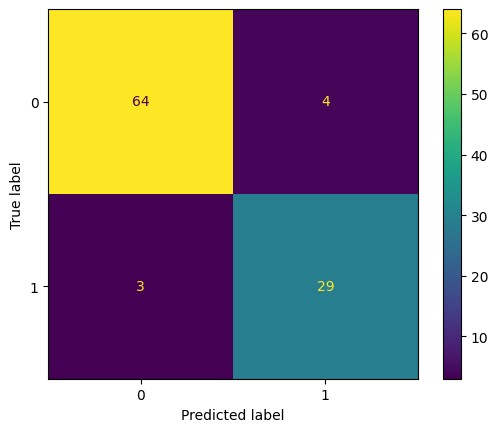

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [33]:
# Establecer los parámetros en el pipeline y ajustar con X_train, y_train
SVC_m.set_params(C=0.61302130, kernel='rbf')
SVC_m.fit(X_trainS, y_train)

# Aplicar el pipeline al conjunto de prueba
y_pred = SVC_m.predict(X_testS)

# Evaluar el modelo en el conjunto de prueba
accuracy = SVC_m.score(X_testS, y_test)
print(f'accuracy: {accuracy}')

matcon(y_test,y_pred,SVC_m)
print(classification_report(y_test,y_pred))

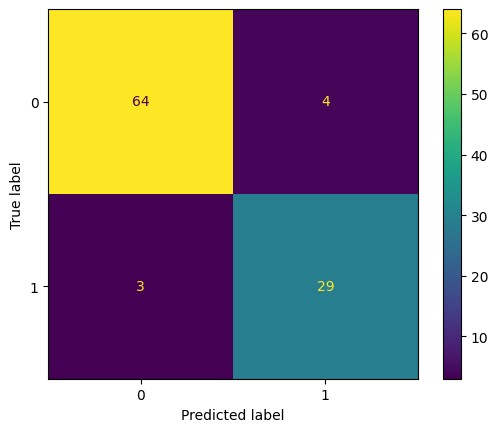

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



(0.058823529411764705, 0.90625)

In [34]:
fmatcon(y_test,y_pred,SVC_m)